In [1]:
%%HTML

<H2> This application tries to help you regulate your mood </H2>

<img src="https://upload.wikimedia.org/wikipedia/en/5/55/Two_Dimensions_of_Emotion.jpg" >



In [2]:
# Importing all necessary packages

#En litt rotete spagettikode det her. Men utgangspunkt for noe bedre.

import numpy as np
import pandas as pd
import librosa, librosa.display
import sklearn
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as ms
ms.use('seaborn-muted')
import IPython.display as Ipd
import os
import joblib

In [3]:
#  '1happy','2excited','3nervous', '4upset', '5depressed', '6bored', '7fatigued', '8calm']

from ipywidgets import VBox, jsdlink, IntSlider
#s1 = IntSlider(description='Wished emotional state', min=1, max=8, value=4)
#s2 = IntSlider(description='Value', value=4)
#jsdlink((s1, 'value'), (s2, 'max'))
#VBox([s1, s2])
print("What is your current state of emotion, and where do you want to be?")
print("0 = happy, 1 = excited , 2 = nervous, 3 = upset, 4 = depressed, 5 = bored, 6 = fatigued, 7 = calm")
s1 = IntSlider(description='Current state', min=0, max=7, value=4)
s2 = IntSlider(description='Wished state', min=0, max=7, value=4)


#print(s1.value)

VBox([s1, s2])

What is your current state of emotion, and where do you want to be?
0 = happy, 1 = excited , 2 = nervous, 3 = upset, 4 = depressed, 5 = bored, 6 = fatigued, 7 = calm


In [4]:
curr_state = [s1.value]
des_state = [s2.value]

print('Current state: ',curr_state)
print('Desired state: ',des_state)

tracks = int(input('How many tracks do you want in the playlist?: '))

output = np.empty((tracks, len(curr_state)), dtype=int)
for col in range(len(curr_state)):
    for row in range(tracks):
        diff = (abs(curr_state[col]-des_state[col]))
        if curr_state[col] < des_state[col]:
            output[row][col] = ((diff/tracks) * (row+1)) + curr_state[col]
        else:
            output[row][col] = ((diff/tracks) * (tracks-(row+1))) + des_state[col]  

print('\n')
print('These are the linear interpolated vectors which will be used to generate the playlists:')

output2 = [tup[0] for tup in output]
print(output2)

Current state:  [2]
Desired state:  [5]
How many tracks do you want in the playlist?: 10


These are the linear interpolated vectors which will be used to generate the playlists:
[2, 2, 2, 3, 3, 3, 4, 4, 4, 5]


In [5]:
label = [0, 1, 2, 3, 4, 5, 6, 7]
sr = 22050

filenames = os.listdir('./VocalSet/scales')
labels = np.zeros((len(filenames)))

print('processing .....')

# A comprehensive survey must be used to figure out which music people associate with different feelings. 
# If we suppose that these genres are associated with those feelings, we can predict which music that 
# In the future can be classified according to the 
#This code presumes that each song is connected to one feeling in the spectrum. The playlist will then interpolate 
#between the feelings.
for i in range(len(filenames)):
    if filenames[i].find('0') != -1:
        labels[i] = 0
    elif filenames[i].find('1') != -1:
        labels[i] = 1
    elif filenames[i].find('2') != -1:
        labels[i] = 2
    elif filenames[i].find('3') != -1:
        labels[i] = 3
    elif filenames[i].find('4') != -1:
        labels[i] = 4
    elif filenames[i].find('5') != -1:
        labels[i] = 5
    elif filenames[i].find('6') != -1:
        labels[i] = 6
    elif filenames[i].find('7') != -1:
        labels[i] = 7
            
print('number of files in database:',(len(filenames)))           
print('Done!')


sr = 22050
print('This is your playlist!')
print('')
found = []
# Iterating over the different techniques in the dataset
for technique in output2:
    for filename in filenames:
        if str(technique) in filename:
            found.append(filename)
            break

# Displaying audio example of each technique from the dataset.
for f, technique in zip(found, labels):
    print(str(f))
    signal, sr = librosa.load('./VocalSet/scales/'+f, sr, mono=True, duration=3)
    Ipd.display(Ipd.Audio(signal, rate=sr))
#nå spiller den av sanger som inneholder tallene. Det er et tilfeldig dataset som er brukt, 
#som ikke har med følelser å gjøre, men datasettet kan lett byttes ut med ekte soundtracks. 
#koden for å tagge følelser er: '0happy','1excited','2nervous', '3upset', '4depressed', '5bored', '6fatigued', '7calm'

processing .....
number of files in database: 26
Done!
This is your playlist!

2nervous_scales_belt_a.wav


2nervous_scales_belt_a.wav


2nervous_scales_belt_a.wav


3upset_scales_breathy_o.wav


3upset_scales_breathy_o.wav


3upset_scales_breathy_o.wav


4depressed_scales_belt_a.wav


4depressed_scales_belt_a.wav


4depressed_scales_belt_a.wav


5bored_scales_breathy_i.wav


[4. 3. 2. 1. 0. 0.]


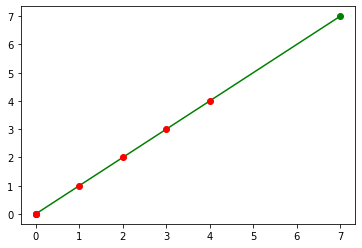

In [26]:
import numpy as np
import matplotlib.pyplot as plt

x = [0, 7]
y = [0, 7]

# x axis: wished state ( vannrett)
# y axis: current state
x_new = output2
#y_new = int(s0.value)

y_new = np.interp(x_new, x, y)
print(y_new)


plt.plot(x, y, "og-", x_new, y_new, "or");

<iframe src="https://open.spotify.com/embed/track/7GHAoJW9LA29amyXVMGxvG" width="300" height="380" frameborder="0" allowtransparency="true" allow="encrypted-media"></iframe>


In [ ]:
%%HTML

<iframe src="https://open.spotify.com/embed/playlist/37i9dQZF1EtjdU2krYy7eD" width="300" height="380" frameborder="0" allowtransparency="true" allow="encrypted-media"></iframe>